In [2]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure

from scipy import signal
from sklearn import datasets, svm, metrics
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata('MNIST original')

In [41]:
def get_img(i):
    return np.reshape(mnist.data[i], (28, 28))


def show(img):
    a = np.min(img)
    b = np.max(img)
    img = (img - a) / (b - a)
    plt.imshow(img, cmap='binary')

image shape: (28, 28)


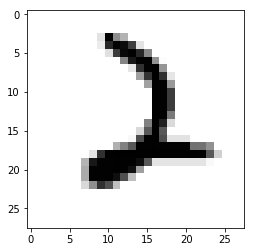

In [71]:
img = get_img(15323)
show(img)
print('image shape:', img.shape)

In [61]:
kernelV = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

kernelH = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

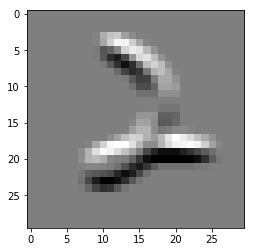

In [68]:
convolved = signal.convolve2d(img, kernelH)
show(convolved)

In [63]:
def pooling(img, n, callback):
    return skimage.measure.block_reduce(img, (n, n), callback)

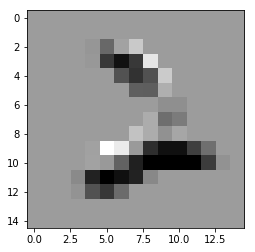

In [69]:
pooled = pooling(convolved, 2, np.max)
show(pooled)

In [65]:
print('convolved shape:', convolved.shape)
print('pooled shape:', pooled.shape)

convolved shape: (30, 30)
pooled shape: (15, 15)


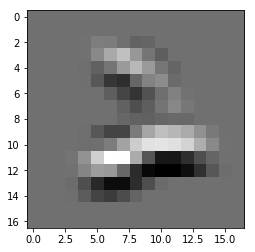

In [66]:
convolved2 = signal.convolve2d(pooled, kernelH)
show(convolved2)

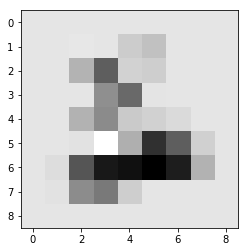

In [67]:
pooled2 = pooling(convolved2, 2, np.max)
show(pooled2)

In [70]:
pooled2.shape

(9, 9)

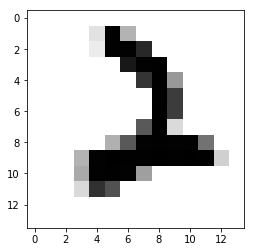

In [80]:
show(pooling(img, 2, np.max))